# KDD2021 - Multi-dataset Time Series Anomaly Detection

Anomaly Detection in Time Series

Multi-dataset Time-Series Anomaly Detection Competition, SIGKDD 2021.

https://compete.hexagon-ml.com/practice/competition/39

## Getting Started

### Overview of the Time Series Anomaly Detection Competition

Detecting Anomaly in univariate time series is a challenge that has been around for more than 50 years. Several attempts have been made but still there is no robust outcome. This year  Prof. Eamonn Keogh and Taposh Roy as part of KDD Cup 2021 are hosting the multi data set time series anomaly detection competition. This goal of this competition is to encourage industry and academia to find a solution for univariate time-series anomaly detection. Prof. Keogh has provided 250 data-sets collected over 20 years of research to further this area. Please review the brief overview video developed by Dr. Keogh.

KDD Cup 2021 Time Series Anomaly Detection Contest Briefing:
https://www.youtube.com/watch?v=m2GV3Tg72i8


### Methods

#### Official
1. (good) 2021 ACM KDD Data Cup: Multi-dataset Time Series Anomaly Detection (Team MDTS):

    (Good: (1) visualized anomaly periods, (2) defined anomaly types (noisy & shaped-based)
    
    https://www.youtube.com/watch?v=gpKBSpf2rVE

2. (less) Time series anomaly detection: TsaDetect

    https://www.youtube.com/watch?v=1v64_tzJPTE

3. (less)

    https://www.youtube.com/watch?v=4PdlUcmwWu0

#### Internet

# Setup

In [1]:
import os
import numpy as np
import re
import pandas as pd

# Using graph_objects
import plotly.graph_objects as go

import matplotlib.pyplot as plt


# Loading data. (10 marks)

Read and split the data into train & test datasets 

In [2]:
path = '../data-sets/KDD-Cup/data/'
filenames = os.listdir(path+'.')   # . is cwd
filenames = [p for p in filenames if p[0].isdigit()]  # Keep filename started by integer, filter out others
filenames = sorted(filenames)

df_datasets = []
datasets = []
train_datasets = []
test_datasets = []

# filenames = [filenames[203]]

# Read and split the data into train & test datasets 
for filename in filenames:
#     print(filename)

    # (1) Get the split-number in file name
    start = filename.find('y_') + 2
    end = filename.find('.txt')
    split_number = int(filename[start:end])
#     print(f'id:{filename[:3]};split:{split_number};len():{len(_dataset)}', end=',\t')

    # (2) Load the .txt as string and format it
    with open (path+filename, "r") as myfile:
        data = myfile.read()
        data = data.replace('\n', '')   #`001.txt` use 
        data = data.replace('   ', ',')
        data = data.replace('  ', ',')
        data = data.split(',')
        data = list(filter(lambda x: len(x)>0, data))

    # (2.1) Save the formated data in Pandas dataframe 
    ## df_datasets format: `set(filename, dataframedf)`
    _df = pd.DataFrame(data, columns=['values'], dtype=float)
    _df.loc[:split_number, 'label'] = 'train'
    _df.loc[split_number::, 'label'] = 'test'
    df_datasets.append((filename, _df))
    
    # (2.2) Save the formated data in numpy array
    _dataset = np.array(data)
    _dataset = _dataset.astype(float)
    datasets.append(_dataset)
    train_datasets.append(_dataset[:split_number])
    test_datasets.append(_dataset[split_number::])

#     print('.', end='')

#     if filename[:3] == '005':
#         break

In [3]:
print(len(df_datasets))

print(df_datasets[0][0])
display(df_datasets[0][1].head(5))
display(df_datasets[0][1].tail(5))



250
001_UCR_Anomaly_35000.txt


,values,label
0,-142.92884,train
1,-164.93265,train
2,-178.50742,train
3,-181.06306,train
4,-172.90648,train


,values,label
79790,17.201994,test
79791,24.004032,test
79792,27.221281,test
79793,34.907786,test
79794,21.102266,test


In [4]:
datasets[0].shape


(79795,)

## Train and Test datasets

In [5]:
print(train_datasets[0])
print(len(train_datasets[0]))

print(test_datasets[0])
print(len(test_datasets[0]))


[-142.92884  -164.93265  -178.50742  ...  -92.864084  -90.697107
  -95.68738 ]
35000
[-89.590922 -95.855328 -96.993773 ...  27.221281  34.907786  21.102266]
44795


# Data preprocessing. (10 marks)

## Visualization

In [6]:
def plotTrainTestDfs(df1: pd.DataFrame = pd.DataFrame(), 
                     df2: pd.DataFrame = pd.DataFrame(), 
                     save: bool = True, 
                     title: str = '', 
                     folder: str='plots'):
    '''Plot the (1) train and (2) test df, and save the plot as .jpg under `/plots/` folder.
    '''
    fig, [ax1, ax2] = plt.subplots(2, figsize=(30,12))
    fig.suptitle(title)

    ax1.plot(df1.loc[:,'values'])
    ax1.set_title(f'Train ({min(df1.index)}~{max(df1.index)})')

    ax2.plot(df2.loc[:,'values'])
    ax2.set_title(f'Test ({min(df2.index)}~{max(df2.index)})')

    if not os.path.exists(folder):
        os.makedirs(folder)
    
    if save:
        plt.savefig(f'{folder}/{title}.jpg')
        plt.close(fig)
    else:
        plt.show()
    
    del fig, ax1, ax2

### Plot all and save as .jpg

In [7]:
# # https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

# for fname, df in df_datasets:
#     train_df = df[df['label']=='train']
#     test_df = df[df['label']=='test']
#     plotTrainTestDfs(train_df, test_df, save=True, title=fname, folder='plots')
#     print('.', end='')

### Plot one

034_UCR_Anomaly_1500.txt


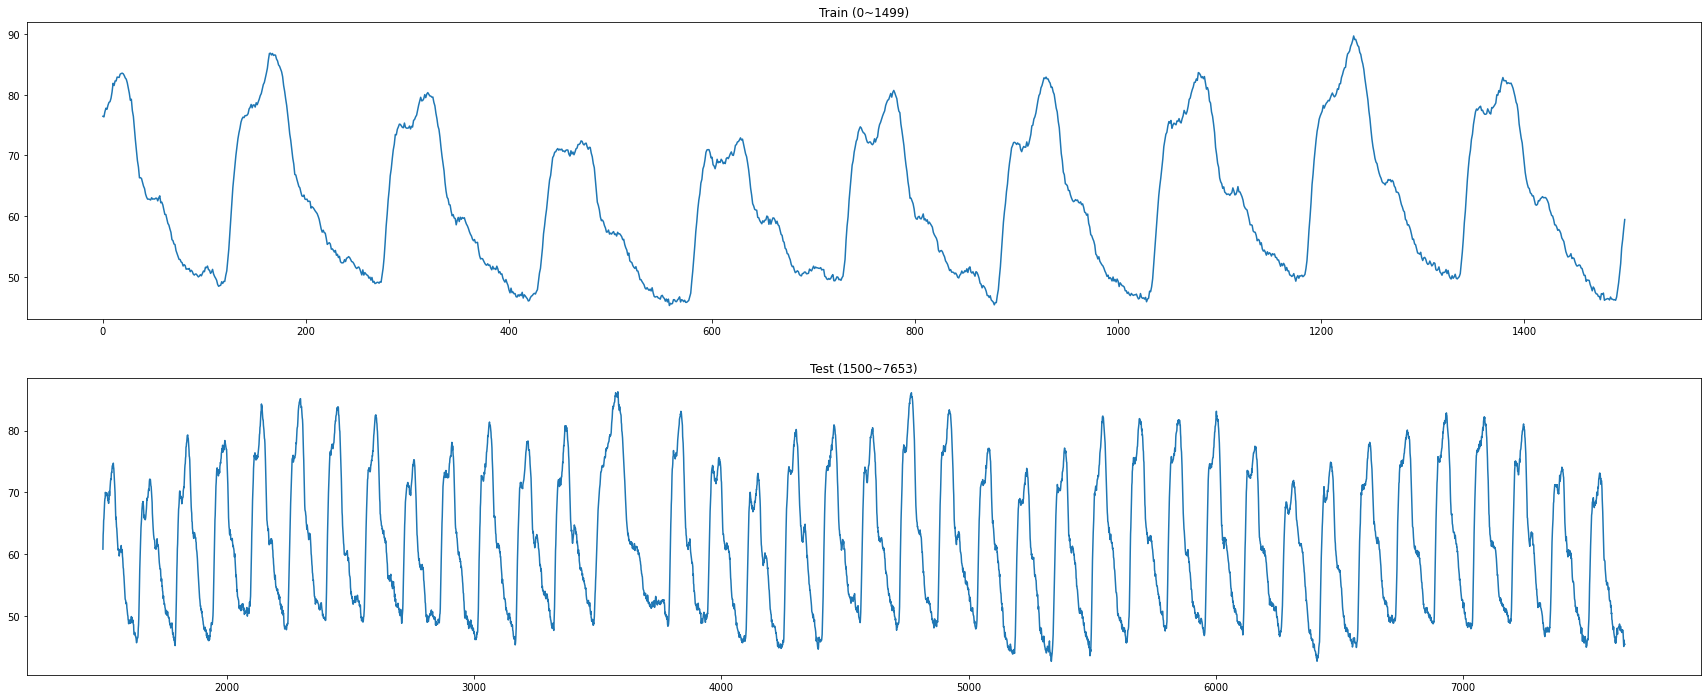

In [8]:
name, df = df_datasets[33]
train_df = df[df['label']=='train']
test_df = df[df['label']=='test']

print(name)
plotTrainTestDfs(train_df, test_df, save=False)


### Using `plotly`


In [9]:

# df = df_datasets[20][1]
# train_df = df[df['label']=='train']
# test_df = df[df['label']=='test']

# print('train')
# fig = go.Figure([go.Scatter(x=train_df.index, y=train_df['values'])])
# fig.show()

# print('test')
# fig = go.Figure([go.Scatter(x=test_df.index, y=test_df['values'])])
# fig.show()
    

In [10]:

# for train, test in zip(train_datasets, test_datasets):

#     # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
#     fig, ax = plt.subplots()
    
# #     ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
# #     linestyle='None', label='Daily')
    
#     ax.plot(train, linewidth=2, label='7-d Rolling Mean')
    
#     ax.plot(test, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
    
#     # Set x-ticks to yearly interval and add legend and labels
# #     ax.xaxis.set_major_locator(mdates.YearLocator())
#     ax.legend()
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Consumption (GWh)')
#     ax.set_title('Trends in Electricity Consumption');
#     break

# Data analysis

In [11]:
name, df = df_datasets[33]
# df = df[df['label']=='train'].loc[:,['values']]

df['values']

0       76.458008
1       76.362195
2       77.233139
3       77.797305
4       77.612248
          ...    
7649    45.042070
7650    46.081865
7651    45.737770
7652    45.362732
7653    45.376655
Name: values, Length: 7654, dtype: float64

## Autocorrelation Function (ACF)

To find the preiod  

** Interpretation of ACF plot:
https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/


https://towardsdatascience.com/predicting-electricity-consumption-with-xgbregressor-a11b71104754

In [12]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Calculate autocorrelation
acf_values = acf(df[df['label']=='train']['values'], nlags=7600, fft=True)

# print(np.round(acf_values, 1))

for i, element in enumerate(np.round(acf_values, 5)):
    if element >= 0.8:
        print(i, element)


0 1.0
1 0.99724
2 0.99139
3 0.98222
4 0.97011
5 0.95522
6 0.93764
7 0.91793
8 0.89621
9 0.87298
10 0.84808
11 0.822
146 0.80078
147 0.81473
148 0.82664
149 0.83588
150 0.84254
151 0.84634
152 0.84714
153 0.845
154 0.83976
155 0.8318
156 0.82095
157 0.80775


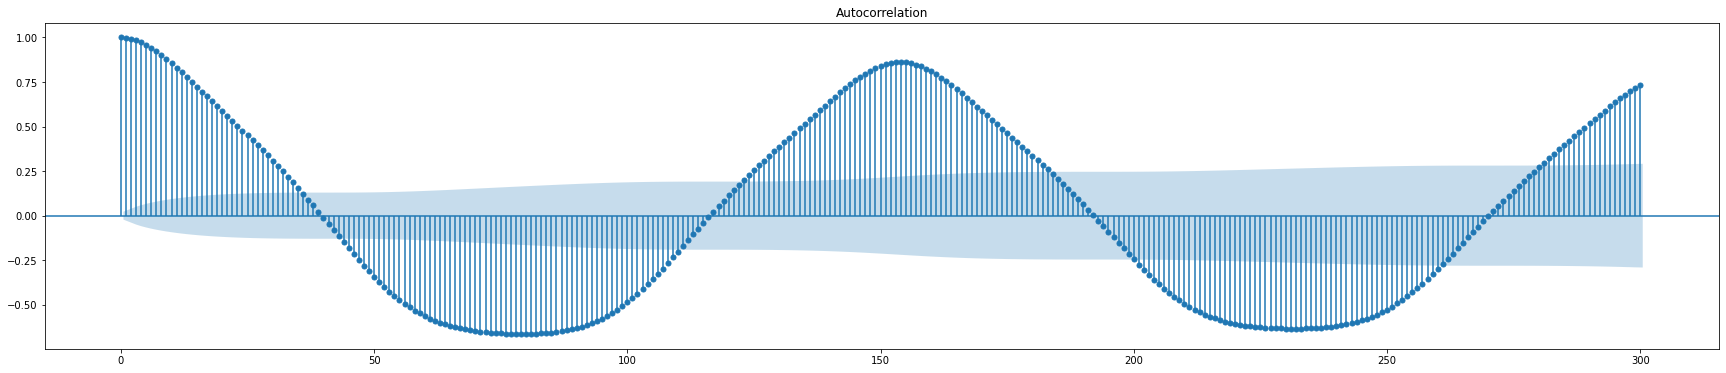

In [13]:

# Plot autocorrelation
N, M = 30, 6
fig, ax = plt.subplots(figsize=(N, M))
_ = plot_acf(df['values'], lags=300, ax=ax)

del fig, ax

## Differencing - to remove seasonality

** Concept, Stationarity and differencing: https://otexts.com/fpp2/stationarity.html

python code ref: https://machinelearningmastery.com/difference-time-series-dataset-python/


`difference(t) = observation(t) - observation(t-1)`

In the above ACF plot, we can see that there is seasonal pattern exists. 

`Differencing` can help stabilize the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality; to stabilise the variance of a time series.


`Differencing` makes a non-stationary time series stationary — compute the differences between consecutive observations.

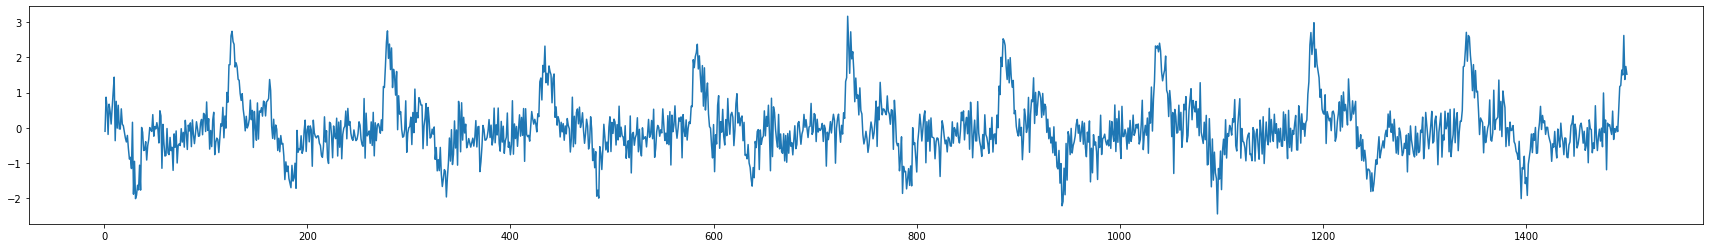

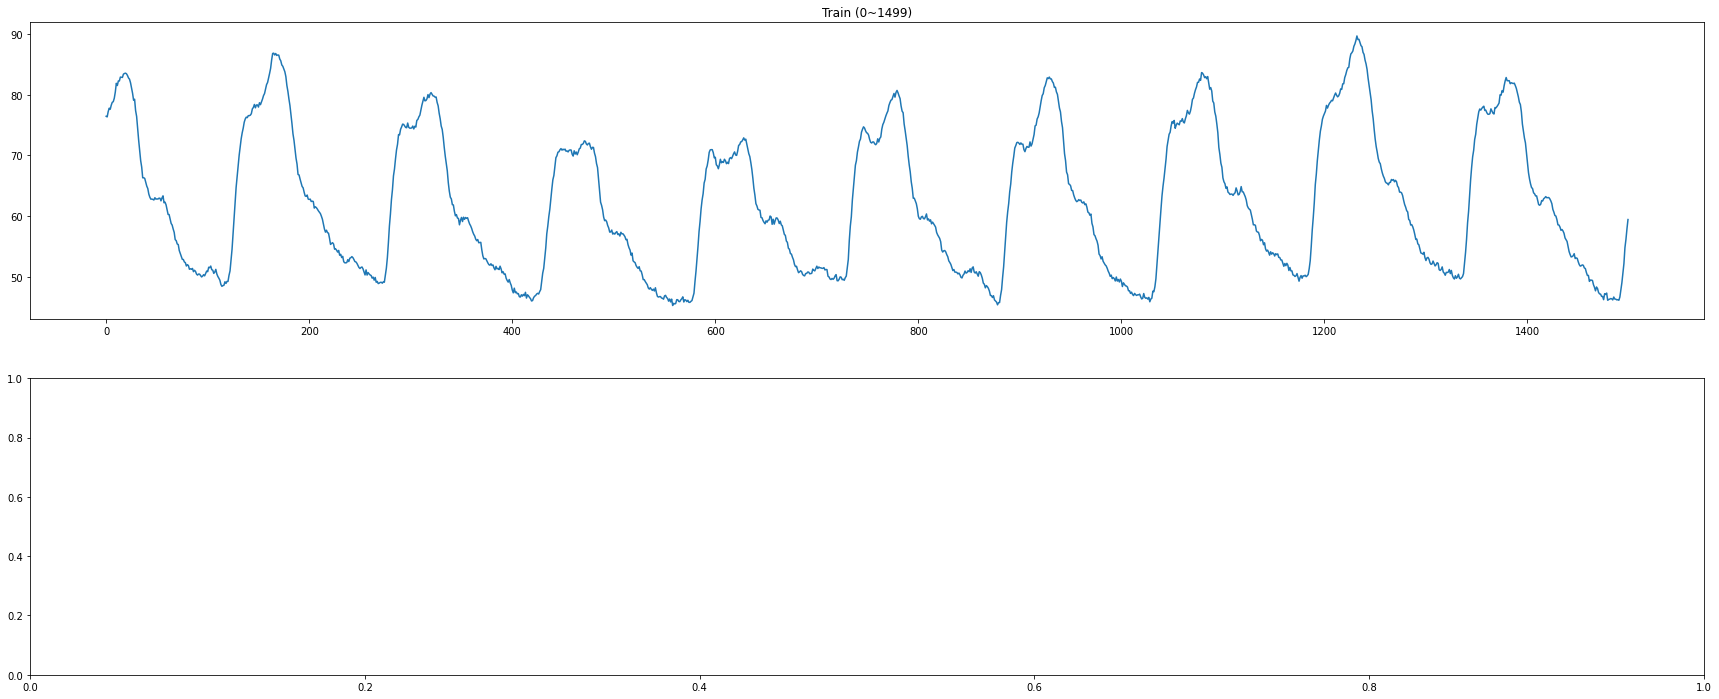

1500


In [14]:
diff = df[df['label']=='train']['values'].diff()
plt.figure(figsize=(30,4))
plt.plot(diff)
plt.show()

plotTrainTestDfs(df[df['label']=='train'], 
#                  df[df['label']=='test'], 
                 save=False)

print(len(diff))

### ACF plot on Differencing


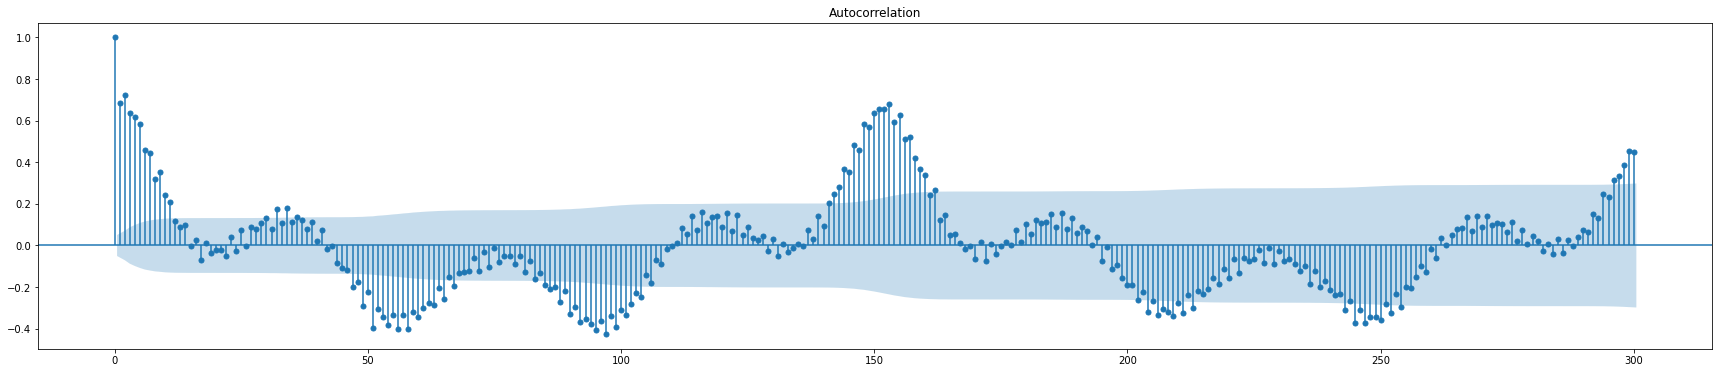

In [15]:
N, M = 30, 6
fig, ax = plt.subplots(figsize=(N, M))
_ = plot_acf(diff.fillna(0), lags=300, ax=ax)

del fig, ax

## Seasonal-Trend-Decomposition

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

034_UCR_Anomaly_1500.txt


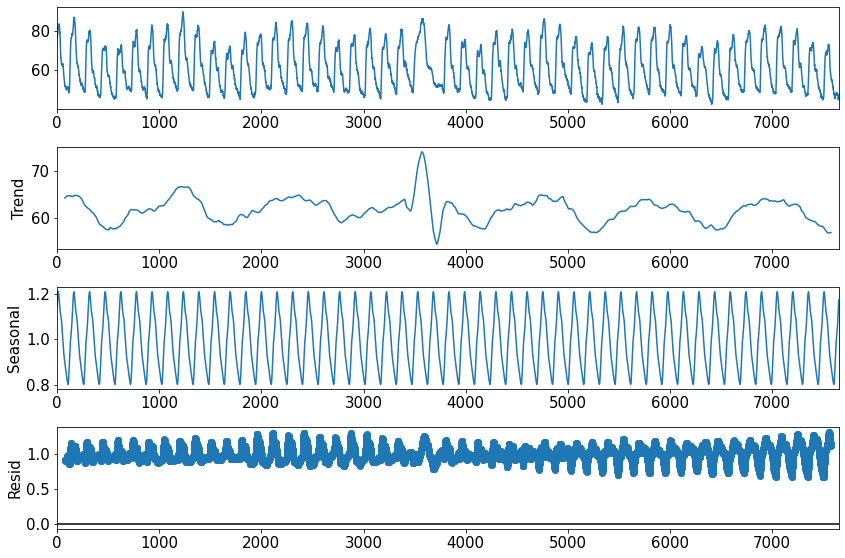

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

print(name)
df = df.loc[:,['values']]

plt.rc('figure',figsize=(12,8))
plt.rc('font', size=15)
result = seasonal_decompose(df, model='multiplicative', period=153)
fig = result.plot()

023_UCR_Anomaly_5000.txt


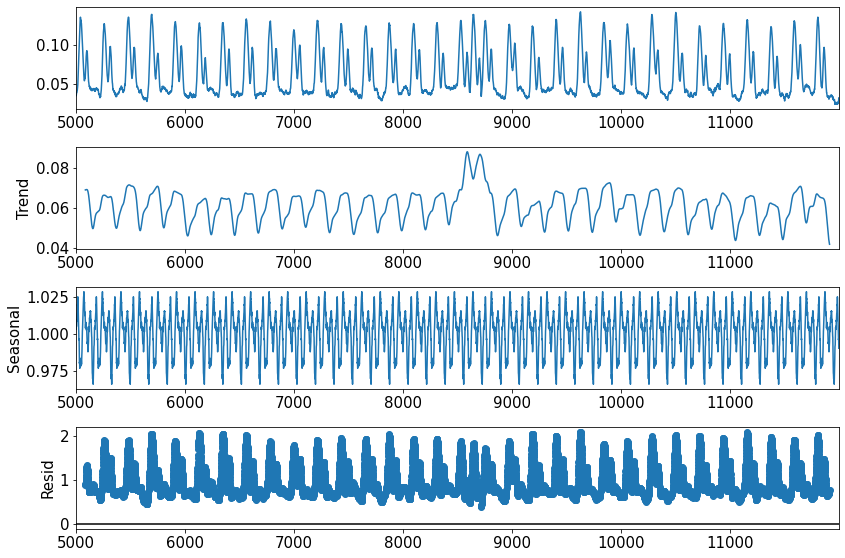

In [17]:
name, df = df_datasets[22]
print(name)
df = df[df['label']=='test'].loc[:,['values']]

plt.rc('figure',figsize=(12,8))
plt.rc('font', size=15)
result = seasonal_decompose(df,model='multiplicative', period=170)
fig = result.plot()

## [x] Fourier Transform

# [x] Prediction algoritm. (20 marks)

# [x] Evaluate model performance (10 marks)

TAs will evaluate your model performance based on Acc presented in Equation (1). (10 marks)